In [1]:
! pip install chromadb -q # vector db
! pip install pillow
! pip install open-clip-torch -q # embedding model

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 525.5/525.5 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 67.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 64.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.7/105.7 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 6.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 698.9/698.9 kB 23.

In [2]:
from transformers import pipeline
pipe=pipeline("image-to-text",model="jinhybr/OCR-Donut-CORD")
import chromadb
from chromadb.utils.embedding_functions import OpenCLIPEmbeddingFunction # for multimodal capabilities
from chromadb.utils.data_loaders import ImageLoader

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/5.03k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/809M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/489 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/1.30M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/4.02M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/1.52k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/355 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/362 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


In [3]:
# create a collection (this is a vector database)
chroma_client = chromadb.PersistentClient(path="my_vectordb")
image_loader=ImageLoader() # loads the images
multimodal_ef= OpenCLIPEmbeddingFunction() # converts the images to embeddings
multimodal_db = chroma_client.get_or_create_collection(name="multimodal_db",

                                                       embedding_function=multimodal_ef,
                                                       data_loader=image_loader)

open_clip_pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

In [4]:
import re
def clean_text(dirty_text):
  text=dirty_text[0]['generated_text']
  # use regular expressions to clean the output of the OCR
  cleaned_text= re.sub(r"<[^>]*>", "", text)
  return cleaned_text



In [7]:
from PIL import Image
import os
metadatas=[]
uris=[]
ids=[]
documents=[]
def read_and_convert(folder_path):
  file_data =[]
  for file_name in os.listdir(folder_path):
    file_path=os.path.join(folder_path,file_name)
    # get the image from the folder and read it using Image
    text=pipe(Image.open(file_path))
    # save the read text as metadata
    text=clean_text(text)

    metadatas.append({"content":text})
    # add the file path as a uri for extraction later
    uris.append(file_path)
  return metadatas

folder_path="images"
file_data=read_and_convert(folder_path)




In [8]:
for data in file_data:
  print(f"Text : {data['content']} \n")

Text :  KINGLEY Street 34 WTB 50H ZA177468-POS-03 15:20 ZAL174 26 Feb 2016) 34 1532 Meantine Pole = 10.20 10.20 2 10.20 Food and Drink 10.20 10.20 VAT Net 2.50 8.50 20% VAT 2.70 20% VAT Total 10.20 10.20 10.20 10.20 1.70 Receipt 5.0 1 0.20 0207 494 0834 895 232 

Text :  Restaurant Name 3 Address 1 1 Address 2 3/15/12 6:06:44 PM 3 John 3 Table: 201 Sec. S Guest 1 1 #11 BLOODY MARY 5 40.75 FRESH OYSTER 1 12.50 553.25 5.33 664.60 664.60 0sI 

Text :  CITY of FALMOUTH 06/18/2003 PAYMENT BECEIPT 0123 0000 TAX 06/18/2003 MURBHY, CHRISTIAN E. Checck Number (s) : 001234 ACTC # M4751R / TRIH* 0019 02 02 629.95 02 Tx 0103 02 02 629.95 0103 05 05 29.53 1289.43 1289.43.00 1259.90.00 1259.90.00 



In [9]:
for uri in uris:
  print(uri + "\n")

images/receipt.jpg

images/receipt-3.jpg

images/receipt-2.png



In [10]:
if all(isinstance(uri, str) for uri in uris):
    print("URIs are valid strings.")  # Proceed with adding to database
else:
    print("URIs are not valid strings.")

URIs are valid strings.


In [11]:
uris

['images/receipt.jpg', 'images/receipt-3.jpg', 'images/receipt-2.png']

In [12]:
metadatas

[{'content': ' KINGLEY Street 34 WTB 50H ZA177468-POS-03 15:20 ZAL174 26 Feb 2016) 34 1532 Meantine Pole = 10.20 10.20 2 10.20 Food and Drink 10.20 10.20 VAT Net 2.50 8.50 20% VAT 2.70 20% VAT Total 10.20 10.20 10.20 10.20 1.70 Receipt 5.0 1 0.20 0207 494 0834 895 232'},
 {'content': ' Restaurant Name 3 Address 1 1 Address 2 3/15/12 6:06:44 PM 3 John 3 Table: 201 Sec. S Guest 1 1 #11 BLOODY MARY 5 40.75 FRESH OYSTER 1 12.50 553.25 5.33 664.60 664.60 0sI'},
 {'content': ' CITY of FALMOUTH 06/18/2003 PAYMENT BECEIPT 0123 0000 TAX 06/18/2003 MURBHY, CHRISTIAN E. Checck Number (s) : 001234 ACTC # M4751R / TRIH* 0019 02 02 629.95 02 Tx 0103 02 02 629.95 0103 05 05 29.53 1289.43 1289.43.00 1259.90.00 1259.90.00'}]

In [13]:
# generate ids for the data
for index, data in enumerate(file_data):
  documents.append(data['content'])
  ids.append(str(index+1))

In [14]:
ids

['1', '2', '3']

In [15]:
documents

[' KINGLEY Street 34 WTB 50H ZA177468-POS-03 15:20 ZAL174 26 Feb 2016) 34 1532 Meantine Pole = 10.20 10.20 2 10.20 Food and Drink 10.20 10.20 VAT Net 2.50 8.50 20% VAT 2.70 20% VAT Total 10.20 10.20 10.20 10.20 1.70 Receipt 5.0 1 0.20 0207 494 0834 895 232',
 ' Restaurant Name 3 Address 1 1 Address 2 3/15/12 6:06:44 PM 3 John 3 Table: 201 Sec. S Guest 1 1 #11 BLOODY MARY 5 40.75 FRESH OYSTER 1 12.50 553.25 5.33 664.60 664.60 0sI',
 ' CITY of FALMOUTH 06/18/2003 PAYMENT BECEIPT 0123 0000 TAX 06/18/2003 MURBHY, CHRISTIAN E. Checck Number (s) : 001234 ACTC # M4751R / TRIH* 0019 02 02 629.95 02 Tx 0103 02 02 629.95 0103 05 05 29.53 1289.43 1289.43.00 1259.90.00 1259.90.00']

In [16]:
# creating the collection

multimodal_db.add(
    documents=documents, # add this to improve the overall accuracy
    ids=ids,
    uris=uris,
    metadatas=metadatas

)

In [17]:
multimodal_db.count() # checking to confirm the elements have been inserting

3

In [18]:
# displaying the result and the images
import matplotlib.pyplot as plt
def format_query_results(query_list:list,query_results:dict) -> None:
  no_of_items = len(query_results['ids'][0])

  for i in range(len(query_list)):
    print(f'Query results : {query_list[i]}')
    for j in range(no_of_items):
      id=query_results["ids"][i][j]
      distance = query_results['distances'][i][j]
      data=query_results['data'][i][j]
      document=query_results['documents'][i][j]
      metadata=query_results['metadatas'][i][j]
      uri = query_results['uris'][i][j]
      print(f'id : {id} , distance : {distance} , data : {metadata}, document : {document}')

      print(f'File name : {uri}')
      plt.imshow(data)
      plt.axis("off")
      plt.show()








Query results : 26 FEB
id : 1 , distance : 0.8263494343578776 , data : {'content': ' KINGLEY Street 34 WTB 50H ZA177468-POS-03 15:20 ZAL174 26 Feb 2016) 34 1532 Meantine Pole = 10.20 10.20 2 10.20 Food and Drink 10.20 10.20 VAT Net 2.50 8.50 20% VAT 2.70 20% VAT Total 10.20 10.20 10.20 10.20 1.70 Receipt 5.0 1 0.20 0207 494 0834 895 232'}, document :  KINGLEY Street 34 WTB 50H ZA177468-POS-03 15:20 ZAL174 26 Feb 2016) 34 1532 Meantine Pole = 10.20 10.20 2 10.20 Food and Drink 10.20 10.20 VAT Net 2.50 8.50 20% VAT 2.70 20% VAT Total 10.20 10.20 10.20 10.20 1.70 Receipt 5.0 1 0.20 0207 494 0834 895 232
File name : images/receipt.jpg


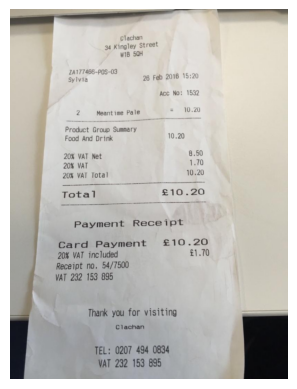

id : 2 , distance : 0.9301271798462069 , data : {'content': ' Restaurant Name 3 Address 1 1 Address 2 3/15/12 6:06:44 PM 3 John 3 Table: 201 Sec. S Guest 1 1 #11 BLOODY MARY 5 40.75 FRESH OYSTER 1 12.50 553.25 5.33 664.60 664.60 0sI'}, document :  Restaurant Name 3 Address 1 1 Address 2 3/15/12 6:06:44 PM 3 John 3 Table: 201 Sec. S Guest 1 1 #11 BLOODY MARY 5 40.75 FRESH OYSTER 1 12.50 553.25 5.33 664.60 664.60 0sI
File name : images/receipt-3.jpg


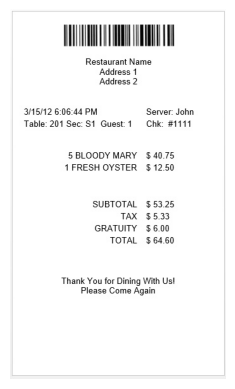

id : 3 , distance : 1.1745694506921964 , data : {'content': ' CITY of FALMOUTH 06/18/2003 PAYMENT BECEIPT 0123 0000 TAX 06/18/2003 MURBHY, CHRISTIAN E. Checck Number (s) : 001234 ACTC # M4751R / TRIH* 0019 02 02 629.95 02 Tx 0103 02 02 629.95 0103 05 05 29.53 1289.43 1289.43.00 1259.90.00 1259.90.00'}, document :  CITY of FALMOUTH 06/18/2003 PAYMENT BECEIPT 0123 0000 TAX 06/18/2003 MURBHY, CHRISTIAN E. Checck Number (s) : 001234 ACTC # M4751R / TRIH* 0019 02 02 629.95 02 Tx 0103 02 02 629.95 0103 05 05 29.53 1289.43 1289.43.00 1259.90.00 1259.90.00
File name : images/receipt-2.png


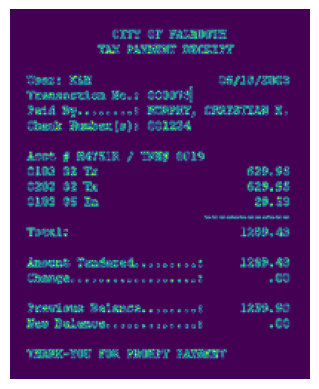

In [30]:
query_text=["26 FEB"]
query_results=multimodal_db.query(
    query_texts=query_text,
    n_results=3,
    include=['distances', 'metadatas','uris','documents','data']

)
# print(query_results)
format_query_results(query_text,query_results)